In [5]:
import numpy as np
import colorspace
import matplotlib.pyplot as plt

In [6]:
from fast_jm import g, limit, chiu_limit

There are four curves on the diagram, so let's chose colours to distinguish between them.

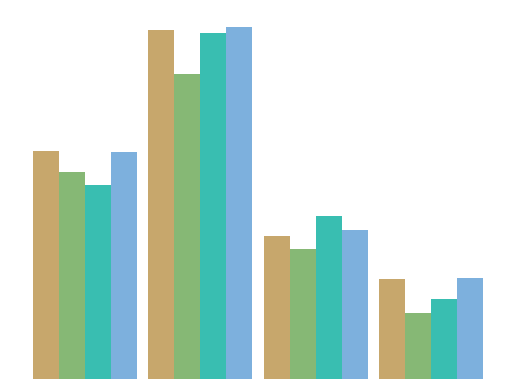

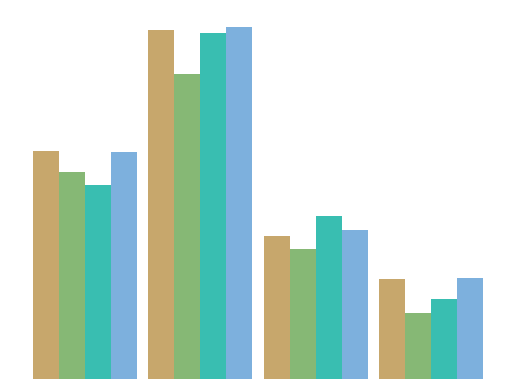

In [150]:
# c = colorspace.choose_palette() # This opens an interactive utility; click "return to python" to make your choice
# c = colorspace.sequential_hcl("Plasma")
# c = colorspace.diverging_hcl("Temps")
c = colorspace.qualitative_hcl("Harmonic")
colorspace.demos.Bar(c(4))

In [242]:
def jm_diagram(colours, save=False):
    """
    'colours' should be a list of four colours.
    """
    rho = 1000000
    fig, ax = plt.subplots()
    c_samples = np.genfromtxt(f'data/rho{rho}-coverage-times.csv')
    u_samples = np.genfromtxt(f'data/unconstrained-rho{rho}-coverage-times.csv')

    my_range = np.arange(min(-20,min(c_samples)-0.1,min(u_samples)-0.1),max(50,max(c_samples)+0.1,max(u_samples)+0.1),0.1)

    c_curve = g(rho,c_samples) # constrained JM
    u_curve = g(rho,u_samples) # unconstrained
    c_curve.sort()
    u_curve.sort()
    ax.plot(c_curve, (np.arange(c_curve.size)+1)/c_curve.size, colours[0], linewidth=2, label="Empirical distribution of $g(T_\\rho,\\rho)$")
    ax.plot(u_curve, (np.arange(u_curve.size)+1)/u_curve.size, colours[-1], linewidth=2, label="Empirical distribution of $g(\\tilde T_\\rho,\\rho)$")

    c_limit = limit(my_range)
    ax.plot(my_range, c_limit, colours[1],linestyle='dashed',linewidth=1.5,label="Limiting cdf of $g(T_\\rho,\\rho)$ (from Thm 2.8)")
    u_limit = chiu_limit(my_range, rho)
    ax.plot(my_range, u_limit, colours[-2],linestyle='dashed',linewidth=1.5,label="Estimated cdf of $g(\\tilde T_\\rho,\\rho)$ (from Chiu 1995)")

    ax.set_ylim(0,1)
    ax.set_xlim(-10,40)
    ax.legend(loc='lower right')
    ax.set_title(f'Coverage time for a Johnson-Mehl process with $\\rho=10^{int(np.log10(rho))}$')
    ax.set_xlabel('$\\beta$')
    ax.set_ylabel('')
    fig.tight_layout()
    if save:
        fig.savefig('jm_diagram.png')
    plt.show()

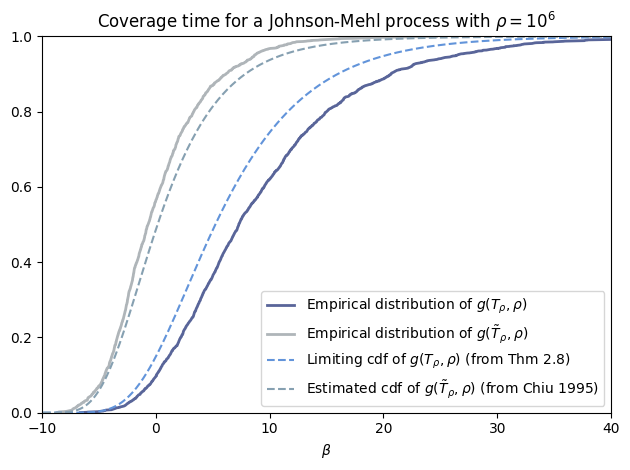

In [231]:
colours = c(5)
colours = [colours[i] for i in [0,1,-2,-1]]
for i in range(2):
    colours[i] = colorspace.utils.lighten(colours[i],0.25)
for i in range(2,4):
    colours[i] = colorspace.utils.darken(colours[i],0.25)
jm_diagram(colours)

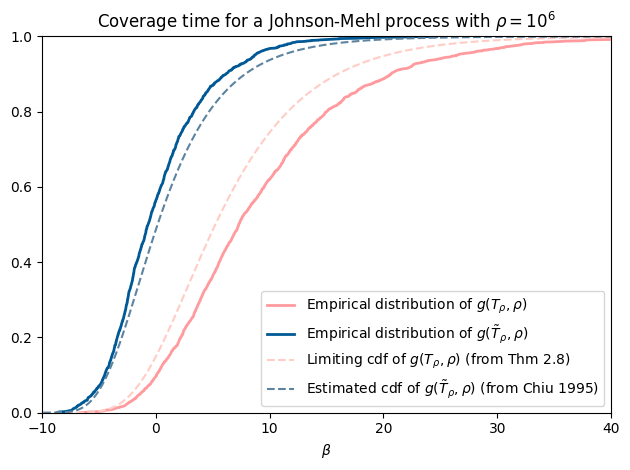

In [243]:
# An alternative approach:
reds  = colorspace.sequential_hcl('Reds')
blues = colorspace.sequential_hcl('Blues')
w = 100
p1 = 0.3
p2 = 0.6
lblue = -0.3
lred = 0.5
r1 = reds(w)[int(p1*w)]
r2 = reds(w)[int(p2*w)]
b1 = blues(w)[int(p1*w)]
b2 = blues(w)[int(p2*w)]
b1 = colorspace.utils.lighten(b1,lblue)
b2 = colorspace.utils.lighten(b2,lblue)
r1 = colorspace.utils.lighten(r1,lred)
r2 = colorspace.utils.lighten(r2,lred)
colours = [r1, r2, b2, b1]
jm_diagram(colours, save=True)

Now that we have a palette we like, we can test how it looks when printed in greyscale, and with various forms of colour-blindness.

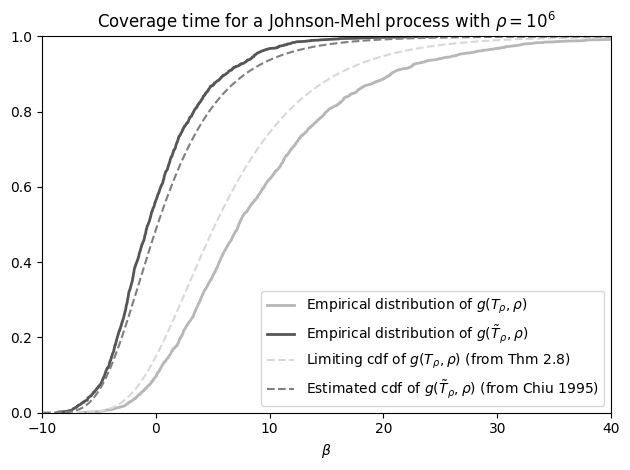

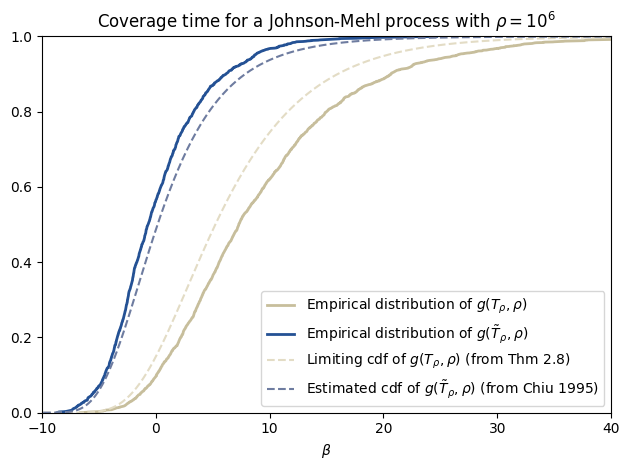

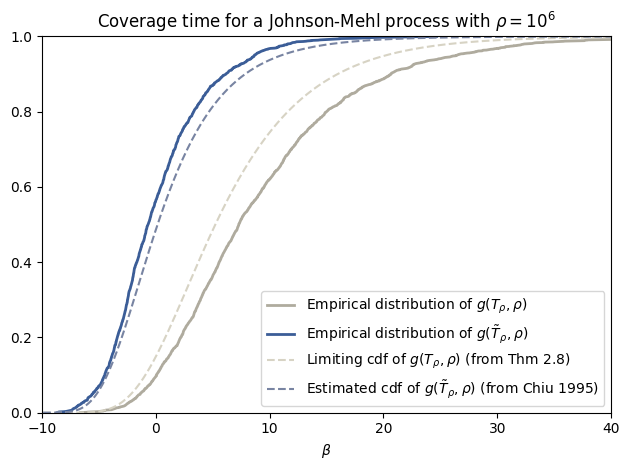

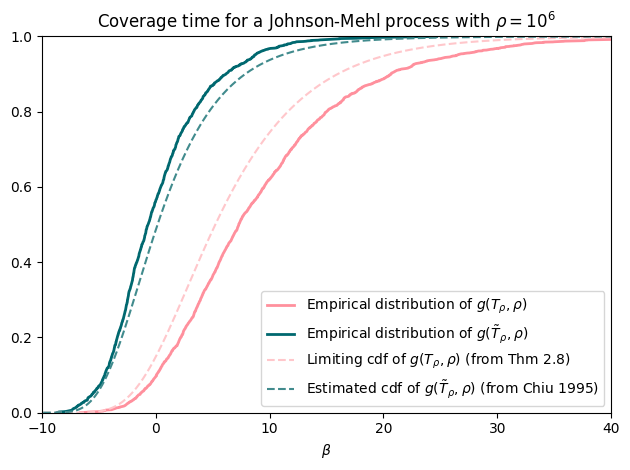

In [244]:
jm_diagram(colorspace.desaturate(colours))
jm_diagram(colorspace.deutan(colours))
jm_diagram(colorspace.protan(colours))
jm_diagram(colorspace.tritan(colours))